In [2]:
!pip install SpaCy

     |████████████████████████████████| 6.6 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.5 MB/s eta 0:00:011
     |████████████████████████████████| 3.0 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 783 kB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 460 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 2.5 MB/s eta 0:00:011
     |████████████████████████████████| 5.9 MB 1.3 MB/s eta 0:00:01


In [4]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 1.3 MB/s eta 0:00:01


In [5]:
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [8]:
tweets= pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [9]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [10]:
tweets=[Text.strip() for Text in tweets.Text]
tweets=[Text for Text in tweets if Text]
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [11]:
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [12]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [13]:
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [14]:
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [18]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_da

[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data

[nltk_data]    | Downloading package words to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/words.zip.
[nltk_data]    | Downloading package ycoe to
[nltk_data]    |     /Users/abhijeetpatil/nltk_data...
[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [19]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

STOP

In [20]:
stop =pd.read_csv("stop.txt")

In [21]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

stoplist=stop.values.tolist()
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict', 'cash', 'flo

In [22]:
stoplist

[["a's"],
 ['able'],
 ['about'],
 ['above'],
 ['according'],
 ['accordingly'],
 ['across'],
 ['actually'],
 ['after'],
 ['afterwards'],
 ['again'],
 ['against'],
 ["ain't"],
 ['all'],
 ['allow'],
 ['allows'],
 ['almost'],
 ['alone'],
 ['along'],
 ['already'],
 ['also'],
 ['although'],
 ['always'],
 ['am'],
 ['among'],
 ['amongst'],
 ['an'],
 ['and'],
 ['another'],
 ['any'],
 ['anybody'],
 ['anyhow'],
 ['anyone'],
 ['anything'],
 ['anyway'],
 ['anyways'],
 ['anywhere'],
 ['apart'],
 ['appear'],
 ['appreciate'],
 ['appropriate'],
 ['are'],
 ["aren't"],
 ['around'],
 ['as'],
 ['aside'],
 ['ask'],
 ['asking'],
 ['associated'],
 ['at'],
 ['available'],
 ['away'],
 ['awfully'],
 ['b'],
 ['be'],
 ['became'],
 ['because'],
 ['become'],
 ['becomes'],
 ['becoming'],
 ['been'],
 ['before'],
 ['beforehand'],
 ['behind'],
 ['being'],
 ['believe'],
 ['below'],
 ['beside'],
 ['besides'],
 ['best'],
 ['better'],
 ['between'],
 ['beyond'],
 ['both'],
 ['brief'],
 ['but'],
 ['by'],
 ['c'],
 ["c'mon"],
 

In [23]:
no_stop_tokens=[word for word in text_tokens if not word in stoplist]
print(no_stop_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [24]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixing', 'please', 'unlock', 'my', 'account', 'u0001f923', 'u0001f923', 'this', 'is', 'true', 'power', 'haha', 'any', 'crypto', 'wallet', 'that', 'won', '\x92', 't', 'give', 'you', 'your', 'private', 'keys', 'should', 'be', 'avoided', 'at', 'all', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'has', 'selected', 'falcon', 'heavy', 'to', 'launch', 'the', 'first', 'two', 'elements', 'of', 'the', 'lunar', 'gateway', 'together', 'on', 'one', 'mission', 'yes', 'once', 'we', 'can', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'will', 'ipo', 'starlink', 'is', 'a', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', 'if', 'we', 'don', 'spacex', 'needs', 'to', 'pass', 'through', 'a', 'deep']


In [25]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['a', 'toddler', 'hodler', 'he', 'definit', 'ha', 'issu', 'but', 'the', 'sentenc', 'seem', 'a', 'bit', 'high', 'thank', 'for', 'fix', 'pleas', 'unlock', 'my', 'account', 'u0001f923', 'u0001f923', 'thi', 'is', 'true', 'power', 'haha', 'ani', 'crypto', 'wallet', 'that', 'won', '\x92', 't', 'give', 'you', 'your', 'privat', 'key', 'should', 'be', 'avoid', 'at', 'all', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'ha', 'select', 'falcon', 'heavi', 'to', 'launch', 'the', 'first', 'two', 'element', 'of', 'the', 'lunar', 'gateway', 'togeth', 'on', 'one', 'mission', 'ye', 'onc', 'we', 'can', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'will', 'ipo', 'starlink', 'is', 'a', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', 'if', 'we', 'don', 'spacex', 'need', 'to', 'pass', 'through', 'a', 'deep']


In [32]:
!python -m spacy download en_core_web_sm 
from spacy import displacy
    
nlp = spacy.load("en_core_web_sm")

     |████████████████████████████████| 12.8 MB 5.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [33]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

i  m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge all thought he would fail himself most of all haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it  s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u0001f923 u0001f923 this is true power haha any crypto wallet that won  t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo star

In [34]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['I', '\x92', 'm', 'an', 'alien', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'be', 'nextlevel', 'have', 'you', 'try', 'it', 'great', 'interview', 'doge', 'be', 'underestimate', 'congratulation', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'be', 'the', 'underdoge', 'all', 'think', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'be', 'the', 'most', 'likely', 'just', 'send', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'it', '\x92', 's', 'get', 'real', 'buy', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'have', 'issue', 'but', 'the', 'sentencing', 'seem', 'a', 'bit', 'high', 'thank', 'for', 'fix', 'please', 'unlock', 'm

In [35]:
clean_data=' '.join(lemmas)
clean_data

'I \x92 m an alien ray trace on cyberpunk with hdr be nextlevel have you try it great interview doge be underestimate congratulation tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo be the underdoge all think he would fail himself most of all haha thank indeed tweet definitely do not represent realworld time allocation the most entertaining outcome be the most likely just send some just agree to do clubhouse with it \x92 s get real buy some dogecoin for lil x so he can be a toddler hodler he definitely have issue but the sentencing seem a bit high thank for fix please unlock my account u0001f923 u0001f923 this be true power haha any crypto wallet that win \x92 t give you your private key should be avoid at all cost your app suck rt nasa have select falcon heavy to launch the first two element of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo starlink be a staggering

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [37]:
print(cv.vocabulary_)

{'an': 225, 'alien': 195, 'ray': 2356, 'trace': 3019, 'on': 2037, 'cyberpunk': 767, 'with': 3379, 'hdr': 1359, 'be': 374, 'nextlevel': 1965, 'have': 1353, 'you': 3417, 'try': 3051, 'it': 1577, 'great': 1305, 'interview': 1556, 'doge': 890, 'underestimate': 3186, 'congratulation': 674, 'tesla': 2924, 'china': 584, 'for': 1178, 'amazing': 218, 'execution': 1060, 'last': 1643, 'year': 3408, 'now': 1994, 'to': 2987, 'the': 2939, 'next': 1964, 'even': 1033, 'more': 1901, 'happy': 1340, 'new': 1962, 'of': 2027, 'ox': 2097, 'frodo': 1208, 'underdoge': 3185, 'all': 197, 'think': 2955, 'he': 1360, 'would': 3393, 'fail': 1094, 'himself': 1401, 'most': 1905, 'haha': 1329, 'thank': 2935, 'indeed': 1497, 'tweet': 3066, 'definitely': 805, 'do': 884, 'not': 1988, 'represent': 2422, 'realworld': 2371, 'time': 2979, 'allocation': 199, 'entertaining': 1003, 'outcome': 2075, 'likely': 1697, 'just': 1601, 'send': 2565, 'some': 2701, 'agree': 180, 'clubhouse': 613, 'get': 1267, 'real': 2366, 'buy': 501, 'd

In [38]:
print(cv.get_feature_names()[100:200])

['74', '78', '7th', '90', '9007', '922', '948', '95', '99', 'aber', 'able', 'abo', 'aboard', 'abort', 'about', 'above', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'afb', 'affair', 'affect', 'affordable', 'africa', 'after', 'afternoon', 'again', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'all', 'allocati'

/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
print(tweetscv.toarray().shape)

(17872, 3429)


In [41]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [42]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'all', 'also', 'an', 'and', 'as', 'at', 'be', 'but', 'by', 'can', 'car', 'come', 'crew', 'day', 'do', 'dragon', 'engine', 'falcon', 'first', 'flight', 'for', 'from', 'get', 'go', 'good', 'great', 'haha', 'have', 'he', 'high', 'if', 'in', 'it', 'just', 'land', 'launch', 'like', 'lot', 'make', 'maybe', 'mission', 'model', 'more', 'most', 'much', 'my', 'need', 'new', 'next', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'out', 'people', 'probably', 'production', 're', 'rt', 'should', 'so', 'some', 'soon', 'spacex', 'starship', 'still', 'sure', 'tesla', 'test', 'than', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'too', 'true', 'u0001f923', 'use', 'very', 'we', 'well', 'what', 'will', 'with', 'work', 'would', 'yeah', 'year', 'yes', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [44]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '100', '13', '20', '2020', '30', '40', '60', 'able', 'about', 'absolutely', 'access', 'accurate', 'actually', 'add', 'after', 'again', 'ago', 'agree', 'ai', 'aim', 'air', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'an', 'and', 'another', 'any', 'appear', 'apply', 'appreciate', 'around', 'article', 'as', 'astronaut', 'at', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'because', 'become', 'before', 'berlin', 'beta', 'between', 'big', 'bit', 'boca', 'body', 'booster', 'both', 'brain', 'build', 'but', 'buy', 'by', 'call', 'camera', 'can', 'car', 'cargo', 'cell', 'chance', 'change', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'crazy', 'create', 'crew', 'critical', 'curevac', 'cybertruck', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'didn', 'difference', 'different', 'do', 'dock', 'doesn', 'doge', 'dojo', 'don', 'down', 'dragon', 

In [45]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [46]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

In [47]:
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                    colormap='Set1',stopwords=STOPWORDS).generate(clean_data)

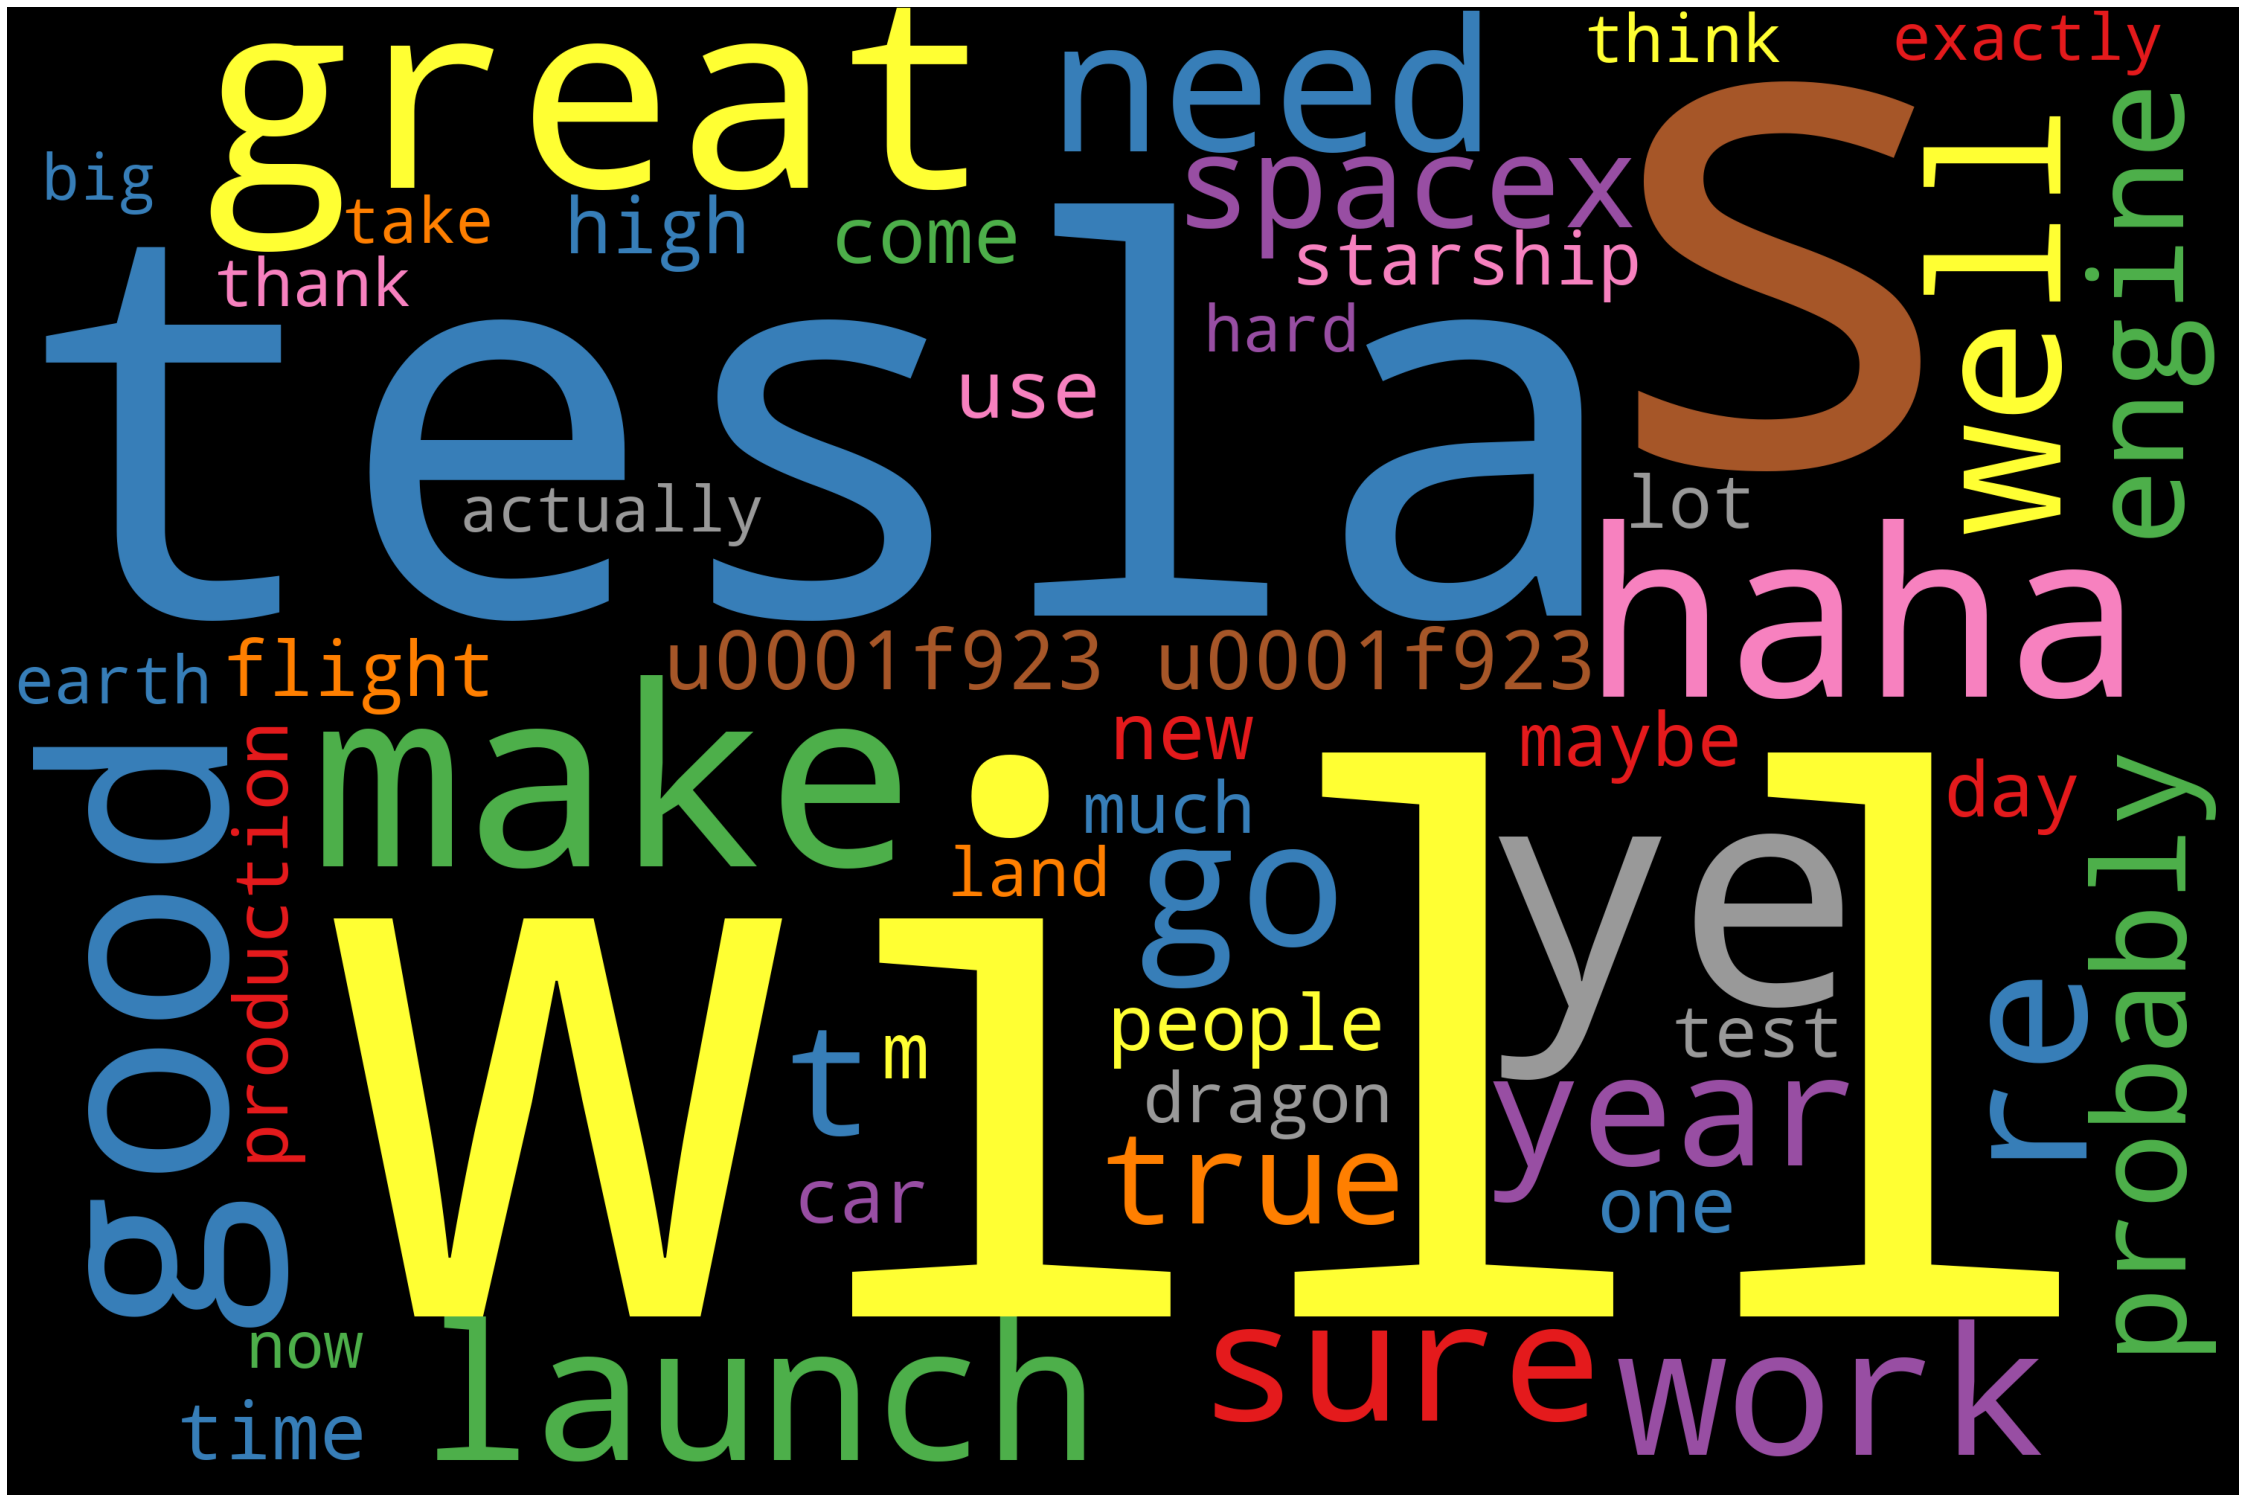

In [48]:
plot_cloud(wordcloud)

In [49]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_data
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)


In [50]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

a DET
toddler NOUN
hodler NOUN
he PRON
definitely ADV
have VERB
issue NOUN
but CCONJ
the DET
sentencing NOUN
seem VERB
a DET
bit NOUN
high ADJ
thank NOUN
for ADP
fix NOUN
please INTJ
unlock VERB
my PRON
account NOUN
u0001f923 ADJ
u0001f923 PROPN
this PRON
be AUX
true ADJ
power NOUN
haha VERB
any DET
crypto NOUN
wallet NOUN
that PRON
win VERB
 PROPN
t NOUN
give VERB
you PRON
your PRON
private ADJ
key NOUN
should AUX
be AUX
avoid VERB
at ADV
all ADV
cost VERB
your PRON
app NOUN
suck PROPN
rt PROPN
nasa PROPN
have AUX
select ADJ
falcon NOUN
heavy ADJ
to PART
launch VERB
the DET
first ADJ
two NUM
element NOUN
of ADP
the DET
lunar ADJ
gateway NOUN
together ADV
on ADP
one NUM
mission NOUN
yes INTJ
once SCONJ
we PRON
can AUX
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
will AUX
ipo NOUN
starlink NOUN
be AUX
a DET
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
if SCONJ
we PRON
don VERB
spacex VERB
need VERB
to PART
pass VERB
throu

In [51]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['take', 'table', 's', '\x92', 'miss', 'work', 'go', 'seem', 'bit', 'appear', 'fix', 'coin', 'unit', 'time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'video', 'people', 'speak', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'come', 's', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'learn', 'earth', 'time', 'tell', 'story', 'spacex', 'read', 's', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'damian', 'thing', 'restaurant', 'get', 'hang', 'sjm', 'currency', 'earth', 'scratch', 'destiny', 'say', 'ship', 'landing', 'burn', 'have', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'have', 'mu', 'launch', 'mission', 'collect', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission']


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 

,word,count
0,be,97
1,have,96
2,launch,64
3,make,64
4,do,50
5,need,50
6,year,49
7,work,49
8,go,48
9,come,40


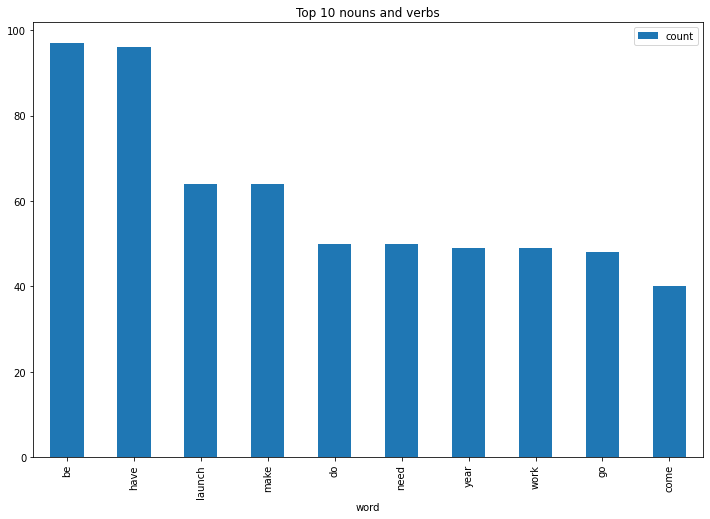

In [53]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [54]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [55]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


AFFIN

In [58]:
!pip install afinn

     |████████████████████████████████| 52 kB 907 kB/s eta 0:00:01
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=c85f5463b6a7874e7862cc2f5e4c6cf29abfacddc4c53451c57af1b40674d249
  Stored in directory: /Users/abhijeetpatil/Library/Caches/pip/wheels/79/91/ee/8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [60]:
affin=pd.read_csv("afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [61]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [62]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [63]:
calculate_sentiment(text='great')

3

In [64]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
919    0
920   -4
921    0
922   -2
923    0
Name: sentiment_value, Length: 924, dtype: int64

In [65]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [66]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69
...,...,...,...
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72


In [67]:
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [68]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [69]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [70]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
911,He was one of the very best.,3,7
913,"@Ali_Afshari In general, we need to improve ho...",4,87
915,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
917,This is both great &amp; terrifying.,3,6


In [71]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13,0
1,Have you tried it?,0,4,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13,3
4,Now on to the next for even more!!,0,8,4
...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11,919
920,"It may never pay out, as the stock cant b ht...",-4,31,920
921,Details Aug 28.,0,3,921
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47,922


/Users/abhijeetpatil/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

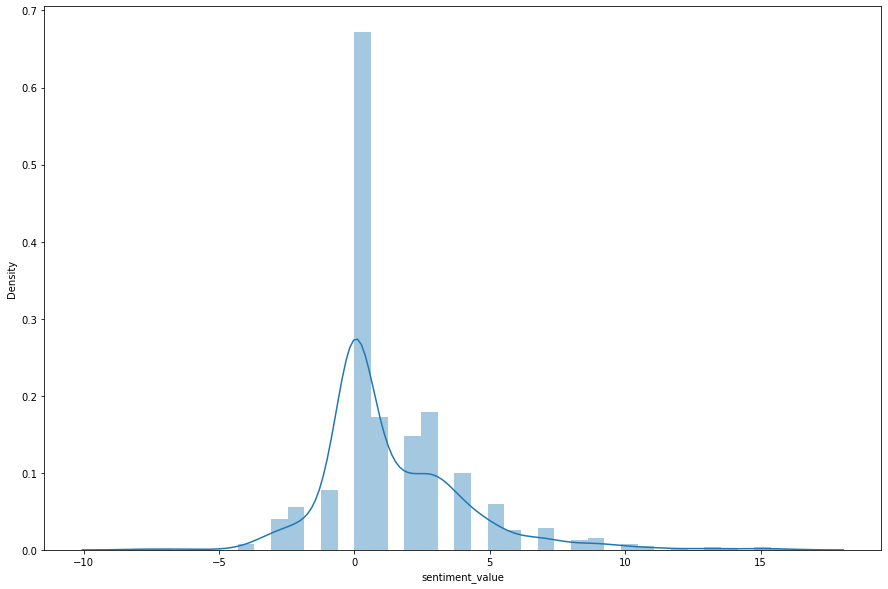

In [72]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

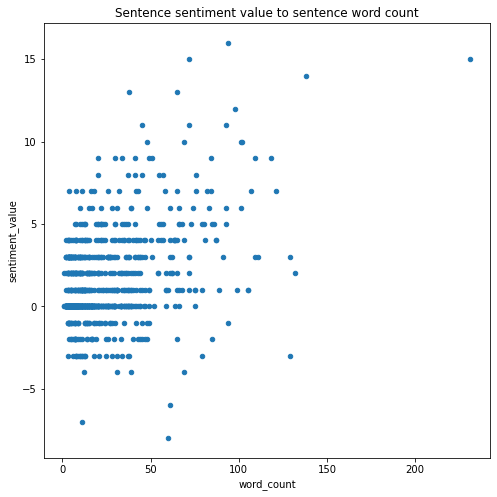

In [73]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

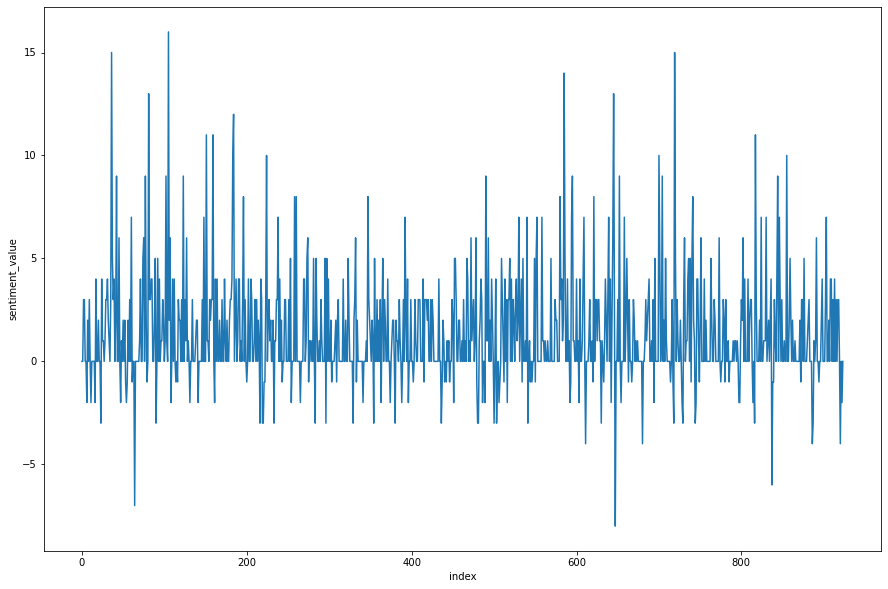

In [74]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)